In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
seqs = np.load("../data/sequences/simulated_sequences.npy", allow_pickle=True)
labels = np.load("../data/sequences/ground_truth_labels.npy", allow_pickle=True)

In [3]:
print(f"Total sequences: {len(seqs)}")
print(f"Length of first sequence: {len(seqs[0])}")
print(f"Example sequence:\n{seqs[0]}")
print(f"Example label sequence:\n{labels[0]}")

Total sequences: 500
Length of first sequence: 50
Example sequence:
['S' 'A' 'P' 'V' 'P' 'F' 'G' 'P' 'S' 'D' 'F' 'G' 'C' 'Y' 'D' 'C' 'C' 'K'
 'F' 'Q' 'K' 'I' 'E' 'N' 'T' 'V' 'N' 'S' 'L' 'T' 'Q' 'Y' 'Y' 'N' 'T' 'H'
 'S' 'D' 'N' 'I' 'A' 'G' 'V' 'T' 'A' 'A' 'A' 'E' 'F' 'N']
Example label sequence:
['other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'alpha-helix' 'alpha-helix' 'alpha-helix' 'alpha-helix' 'alpha-helix'
 'alpha-helix']


In [4]:
amino_acids = list("ARNDCEQGHILKMFPSTWYV")
state_counts = {'alpha-helix': Counter(), 'other': Counter()}

for seq, lbl in zip(seqs, labels):
    for aa, state in zip(seq, lbl):
        state_counts[state][aa] += 1

In [5]:
aa_freq_helix = [state_counts['alpha-helix'][aa] for aa in amino_acids]
aa_freq_other = [state_counts['other'][aa] for aa in amino_acids]

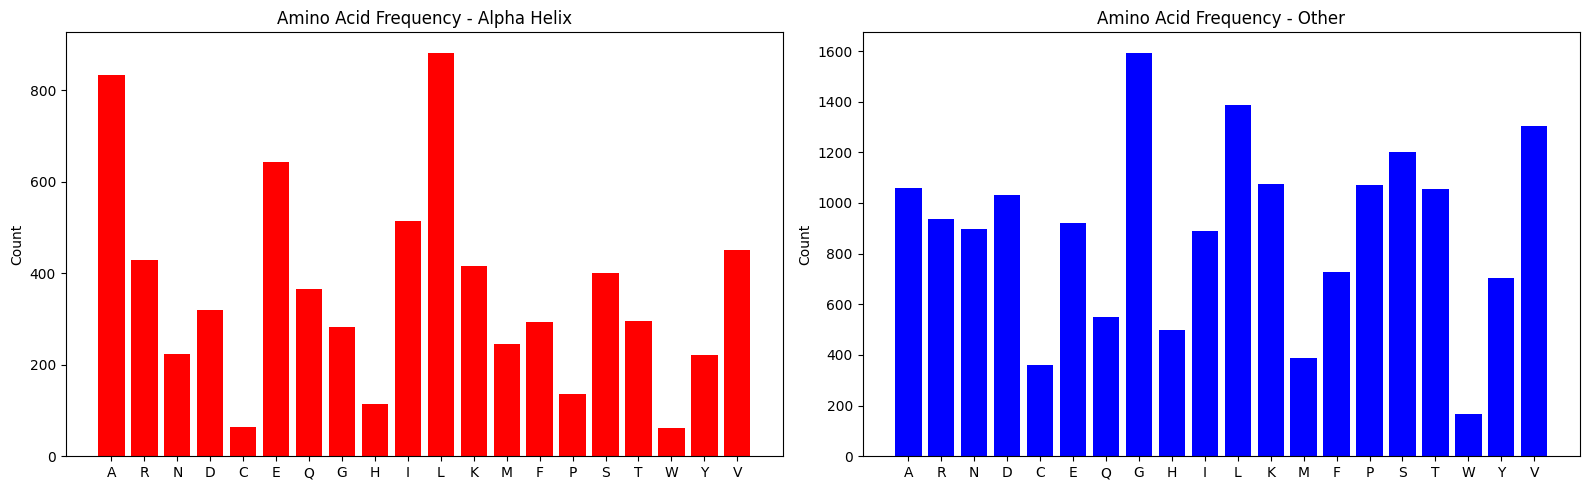

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].bar(amino_acids, aa_freq_helix, color='red')
ax[0].set_title("Amino Acid Frequency - Alpha Helix")
ax[0].set_ylabel("Count")

ax[1].bar(amino_acids, aa_freq_other, color='blue')
ax[1].set_title("Amino Acid Frequency - Other")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

C:\Users\elang\AppData\Local\Temp\ipykernel_21920\3049602481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(state_total.keys()), y=list(state_total.values()), palette="pastel")


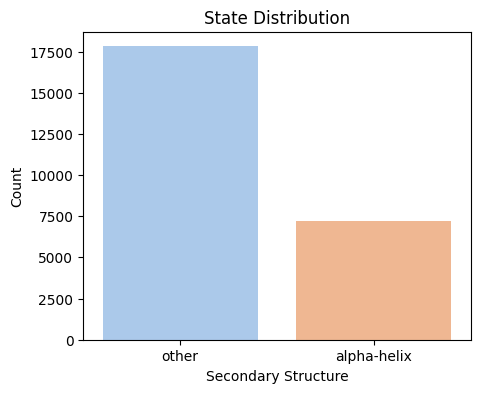

In [7]:
# State distribution
all_states = [state for seq in labels for state in seq]
state_total = Counter(all_states)

plt.figure(figsize=(5, 4))
sns.barplot(x=list(state_total.keys()), y=list(state_total.values()), palette="pastel")
plt.title("State Distribution")
plt.ylabel("Count")
plt.xlabel("Secondary Structure")
plt.show()


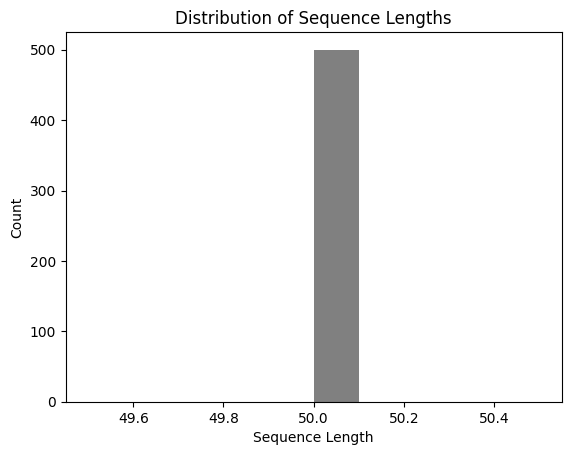

In [8]:
# Sequence length distribution (sanity check)
lengths = [len(seq) for seq in seqs]
plt.hist(lengths, bins=10, color='gray')
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.show()
